In [1]:
!pip install spacy

!pip install nltk
#!python -m spacy download en_core_web_md

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import string
import spacy

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [3]:
import pandas
book=pd.read_csv(r"/content/apple.txt",error_bad_lines=False)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 6: expected 1 fields, saw 14\n'


## Preprocessing
1.Tokensization
2.Normalization
3.Stemming
4.Limitazation

In [4]:
book

,x
0,It's amazing..... battery last around 10 -12 h...
1,Finally a MacBook possession. Got it in 50k in...
2,Best Laptop under 60k. If you don't want any a...
3,Pros:1. Light weight and super fast response t...
4,""""
5,I am very upset about the product as I checked...
6,Reason for 1 star is I ot an defective piece. ...
7,Got the Apple Macbook air on amazon discount s...
8,White line coming on screen in just three mont...
9,"Bought this product recently on 5 April, was w..."


In [5]:
#remove both the leading and the trailing characters
book=[x.strip() for x in book.x]  
# removes empty strings,because they are considered in python as Flase
book=[x for x in book if x]
# 
book[0:10]

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by wo

.strip will seperate words on basis of spaces btwn then

x is column name 

In [6]:
# Joining the list into one string/line
text=" ".join(book)
text

'It\'s amazing..... battery last around 10 -12 hrs.....best laptop for students and coders Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can\'t be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by worki

In [7]:
# Punctualtion 
no_punc_text=text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'Its amazing battery last around 10 12 hrsbest laptop for students and coders Finally a MacBook possession Got it in 50k in Diwali sale Technically good laptopGood Newsluxury product niche technology good battery life reliable machine other laptops crash and become defunct in 610 years no antivirus required security of data and transactions much better Terrific sense of possession  prideBad News Problems will be there if you are switching from windows based system  very less space in hard disk no CD drive inability to transfer data from Mac to your existing external hard disc unless you format it apps are mostly paid and re unreasonably expensive no free apps which are available otherwise on google play store even the angry bird costs Rs 400  all printers are not compatible eg the most economical MFD laser printer RICOH SP 111 cant be used huge compatibility issues with Pages MS Word and Keynote powerpoint unless you master it by working on these still mostly the document and slides ei

In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### Tokenizing
it will seperate text on basis of space

In [9]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])

['Its', 'amazing', 'battery', 'last', 'around', '10', '12', 'hrsbest', 'laptop', 'for', 'students', 'and', 'coders', 'Finally', 'a', 'MacBook', 'possession', 'Got', 'it', 'in', '50k', 'in', 'Diwali', 'sale', 'Technically', 'good', 'laptopGood', 'Newsluxury', 'product', 'niche', 'technology', 'good', 'battery', 'life', 'reliable', 'machine', 'other', 'laptops', 'crash', 'and', 'become', 'defunct', 'in', '610', 'years', 'no', 'antivirus', 'required', 'security', 'of']


In [10]:
len(text_tokens)

3444

In [11]:
text_tokens[0:10]

['Its',
 'amazing',
 'battery',
 'last',
 'around',
 '10',
 '12',
 'hrsbest',
 'laptop',
 'for']

#### Stopwords

In [12]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words=stopwords.words('english')
my_stop_words.append('the')
my_stop_words.append('Its')

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['amazing', 'battery', 'last', 'around', '10', '12', 'hrsbest', 'laptop', 'students', 'coders', 'Finally', 'MacBook', 'possession', 'Got', '50k', 'Diwali', 'sale', 'Technically', 'good', 'laptopGood', 'Newsluxury', 'product', 'niche', 'technology', 'good', 'battery', 'life', 'reliable', 'machine', 'laptops', 'crash', 'become', 'defunct', '610', 'years', 'antivirus', 'required', 'security', 'data', 'transactions']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
my_stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [14]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words=stopwords.words('english')
my_stop_words.append('the')
my_stop_words.append('Its')
my_stop_words.append('hrsbest')

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['amazing', 'battery', 'last', 'around', '10', '12', 'laptop', 'students', 'coders', 'Finally', 'MacBook', 'possession', 'Got', '50k', 'Diwali', 'sale', 'Technically', 'good', 'laptopGood', 'Newsluxury', 'product', 'niche', 'technology', 'good', 'battery', 'life', 'reliable', 'machine', 'laptops', 'crash', 'become', 'defunct', '610', 'years', 'antivirus', 'required', 'security', 'data', 'transactions', 'much']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
help(pd.DataFrame)

Help on class DataFrame in module pandas.core.frame:

class DataFrame(pandas.core.generic.NDFrame, pandas.core.arraylike.OpsMixin)
 |  DataFrame(data=None, index: 'Axes | None' = None, columns: 'Axes | None' = None, dtype: 'Dtype | None' = None, copy: 'bool | None' = None)
 |  
 |  Two-dimensional, size-mutable, potentially heterogeneous tabular data.
 |  
 |  Data structure also contains labeled axes (rows and columns).
 |  Arithmetic operations align on both row and column labels. Can be
 |  thought of as a dict-like container for Series objects. The primary
 |  pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, dataclass or list-like objects. If
 |      data is a dict, column order follows insertion-order.
 |  
 |      .. versionchanged:: 0.25.0
 |         If data is a list of dicts, column order follows insertion-order.
 |  
 |  index : Index or ar

### Normalization
It will convert all texts to lower case

In [16]:
#Normalize the data/converting to lower case
lower_words=[x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['amazing', 'battery', 'last', 'around', '10', '12', 'laptop', 'students', 'coders', 'finally', 'macbook', 'possession', 'got', '50k', 'diwali', 'sale', 'technically', 'good', 'laptopgood', 'newsluxury', 'product', 'niche', 'technology', 'good', 'battery']


### Stremming
Removes the "ing" from text

In [17]:
# Streamming
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['amaz', 'batteri', 'last', 'around', '10', '12', 'laptop', 'student', 'coder', 'final', 'macbook', 'possess', 'got', '50k', 'diwali', 'sale', 'technic', 'good', 'laptopgood', 'newsluxuri', 'product', 'nich', 'technolog', 'good', 'batteri', 'life', 'reliabl', 'machin', 'laptop', 'crash', 'becom', 'defunct', '610', 'year', 'antiviru', 'requir', 'secur', 'data', 'transact', 'much']


In [18]:
!python -m spacy download en

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-01-24 07:07:27.521702: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 73.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [19]:
# NLP english language model of spacy liabrary
nlp=spacy.load('en_core_web_sm')

### Limitazation
just try to get words to its root form

In [20]:
#lemmas being one odf them, but mostly POS,which will follow later
doc=nlp(' '.join(no_stop_tokens))
print(doc[0:40])

amazing battery last around 10 12 laptop students coders Finally MacBook possession Got 50k Diwali sale Technically good laptopGood Newsluxury product niche technology good battery life reliable machine laptops crash become defunct 610 years antivirus required security data transactions much


In [21]:
lemmas=[token.lemma_ for token in doc]
print(lemmas[0:25])

['amazing', 'battery', 'last', 'around', '10', '12', 'laptop', 'student', 'coder', 'finally', 'MacBook', 'possession', 'Got', '50k', 'diwali', 'sale', 'technically', 'good', 'laptopgood', 'newsluxury', 'product', 'niche', 'technology', 'good', 'battery']


## Feature Extraction
NLP(Natural Language Processing) Applications

1.Sentimate Analysis
2.NER(Name Entatity Recomendations)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(lemmas) 

In [23]:
vectorizer.vocabulary_

{'amazing': 69,
 'battery': 118,
 'last': 456,
 'around': 94,
 '10': 0,
 '12': 6,
 'laptop': 449,
 'student': 763,
 'coder': 179,
 'finally': 319,
 'macbook': 488,
 'possession': 610,
 'got': 359,
 '50k': 34,
 'diwali': 248,
 'sale': 685,
 'technically': 779,
 'good': 356,
 'laptopgood': 452,
 'newsluxury': 540,
 'product': 629,
 'niche': 542,
 'technology': 780,
 'life': 466,
 'reliable': 661,
 'machine': 490,
 'crash': 204,
 'become': 122,
 'defunct': 225,
 '610': 44,
 'year': 882,
 'antivirus': 80,
 'require': 669,
 'security': 698,
 'datum': 216,
 'transaction': 818,
 'much': 530,
 'well': 857,
 'terrific': 785,
 'sense': 704,
 'pridebad': 620,
 'news': 539,
 'problems': 625,
 'switch': 772,
 'window': 864,
 'base': 116,
 'system': 773,
 'less': 463,
 'space': 738,
 'hard': 373,
 'disk': 243,
 'cd': 165,
 'drive': 253,
 'inability': 406,
 'transfer': 819,
 'mac': 487,
 'exist': 290,
 'external': 301,
 'disc': 241,
 'unless': 826,
 'format': 330,
 'app': 83,
 'mostly': 524,
 'pay': 

In [24]:
pd.DataFrame(vectorizer.vocabulary_,columns=vectorizer.vocabulary_.keys(),index=[0]).T

,0
amazing,69
battery,118
last,456
around,94
10,0
...,...
friendliness,337
compactness,184
remarkable,662
455,28


In [25]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head()

,0
yr,887
youtube,886
you,885
yes,884
yearsmy,883


In [26]:
print(vectorizer.vocabulary_)

{'amazing': 69, 'battery': 118, 'last': 456, 'around': 94, '10': 0, '12': 6, 'laptop': 449, 'student': 763, 'coder': 179, 'finally': 319, 'macbook': 488, 'possession': 610, 'got': 359, '50k': 34, 'diwali': 248, 'sale': 685, 'technically': 779, 'good': 356, 'laptopgood': 452, 'newsluxury': 540, 'product': 629, 'niche': 542, 'technology': 780, 'life': 466, 'reliable': 661, 'machine': 490, 'crash': 204, 'become': 122, 'defunct': 225, '610': 44, 'year': 882, 'antivirus': 80, 'require': 669, 'security': 698, 'datum': 216, 'transaction': 818, 'much': 530, 'well': 857, 'terrific': 785, 'sense': 704, 'pridebad': 620, 'news': 539, 'problems': 625, 'switch': 772, 'window': 864, 'base': 116, 'system': 773, 'less': 463, 'space': 738, 'hard': 373, 'disk': 243, 'cd': 165, 'drive': 253, 'inability': 406, 'transfer': 819, 'mac': 487, 'exist': 290, 'external': 301, 'disc': 241, 'unless': 826, 'format': 330, 'app': 83, 'mostly': 524, 'pay': 586, 'unreasonably': 827, 'expensive': 292, 'free': 333, 'avail

In [27]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])

['9th', 'able', 'accidental', 'accounting', 'act', 'adapt', 'add', 'additionaly', 'advantage', 'affordable', 'after', 'again', 'againcontacte', 'ahead', 'air', 'all', 'almost', 'along', 'also', 'amazing', 'amazingnice', 'amazon', 'amazoni', 'among', 'and', 'android', 'angle', 'angry', 'another', 'answer', 'antivirus', 'anyone', 'anything', 'app', 'appario', 'apple', 'appleappleapple', 'apples', 'application', 'apprehensive', 'appropriate', 'appsnumber', 'april', 'arenot', 'around', 'ask', 'aspect', 'atleast', 'atomic', 'audio']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [28]:
print(X.toarray().shape)

(2100, 888)


### Bigrams & Trigrams

In [29]:
vectorizer_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=vectorizer_ngram_range.fit_transform(book)

In [30]:
bow_matrix_ngram

<40x100 sparse matrix of type '<class 'numpy.int64'>'
	with 1014 stored elements in Compressed Sparse Row format>

In [31]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['about', 'after', 'air', 'all', 'am', 'amazon', 'an', 'and', 'any', 'apple', 'are', 'around', 'as', 'at', 'battery', 'be', 'best', 'better', 'bought', 'but', 'buy', 'can', 'cost', 'display', 'even', 'external', 'fine', 'for', 'from', 'get', 'good', 'got', 'great', 'hard', 'have', 'if', 'if you', 'if you are', 'in', 'is', 'is not', 'issues', 'it', 'it is', 'its', 'just', 'keyboard', 'laptop', 'like', 'mac', 'macbook', 'macbook air', 'me', 'months', 'my', 'need', 'no', 'not', 'now', 'of', 'of the', 'on', 'on this', 'one', 'only', 'or', 'other', 'product', 'quality', 'sale', 'screen', 'service', 'service center', 'so', 'some', 'still', 'stopped', 'that', 'the', 'then', 'they', 'this', 'to', 'using', 'very', 'want', 'want to', 'warranty', 'was', 'which', 'while', 'will', 'windows', 'with', 'working', 'would', 'year', 'years', 'you', 'you are']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 8 1]
 [1 0 0 ... 0 7 1]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 0]]


## TFidf Vectorizer

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features=TfidfVectorizer(norm="l2",analyzer='word',ngram_range=(2,3),max_features=10)
tf_idf_metrix_n_gram_max_features=vectorizer_n_gram_max_features.fit_transform(book)

print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_metrix_n_gram_max_features.toarray())

['can be', 'if you', 'if you are', 'is not', 'macbook air', 'of the', 'on this', 'want to', 'you are', 'you can']
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.34499501 0.31102675 0.34499501 0.         0.         0.65358713
  0.         0.         0.34499501 0.34499501]
 [0.         0.87936383 0.24385051 0.         0.         0.
  0.         0.21984096 0.24385051 0.24385051]
 [0.         0.         0.         0.70710678 0.         0.70710678
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.50467965 0.48033037 0.
  0.         0.48033037 0.         0.53278883]
 [0.         0

### Generate wordcloud

In [33]:
# Import Packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud,STOPWORDS

#Define a funtion to plot word cloud
def plot_cloud(wordcloud):
  #set figure size
  plt.figure(figsize=(40,30))
  #Display image 
  plt.imshow(wordcloud)
  # No axis details
  plt.axis("off");

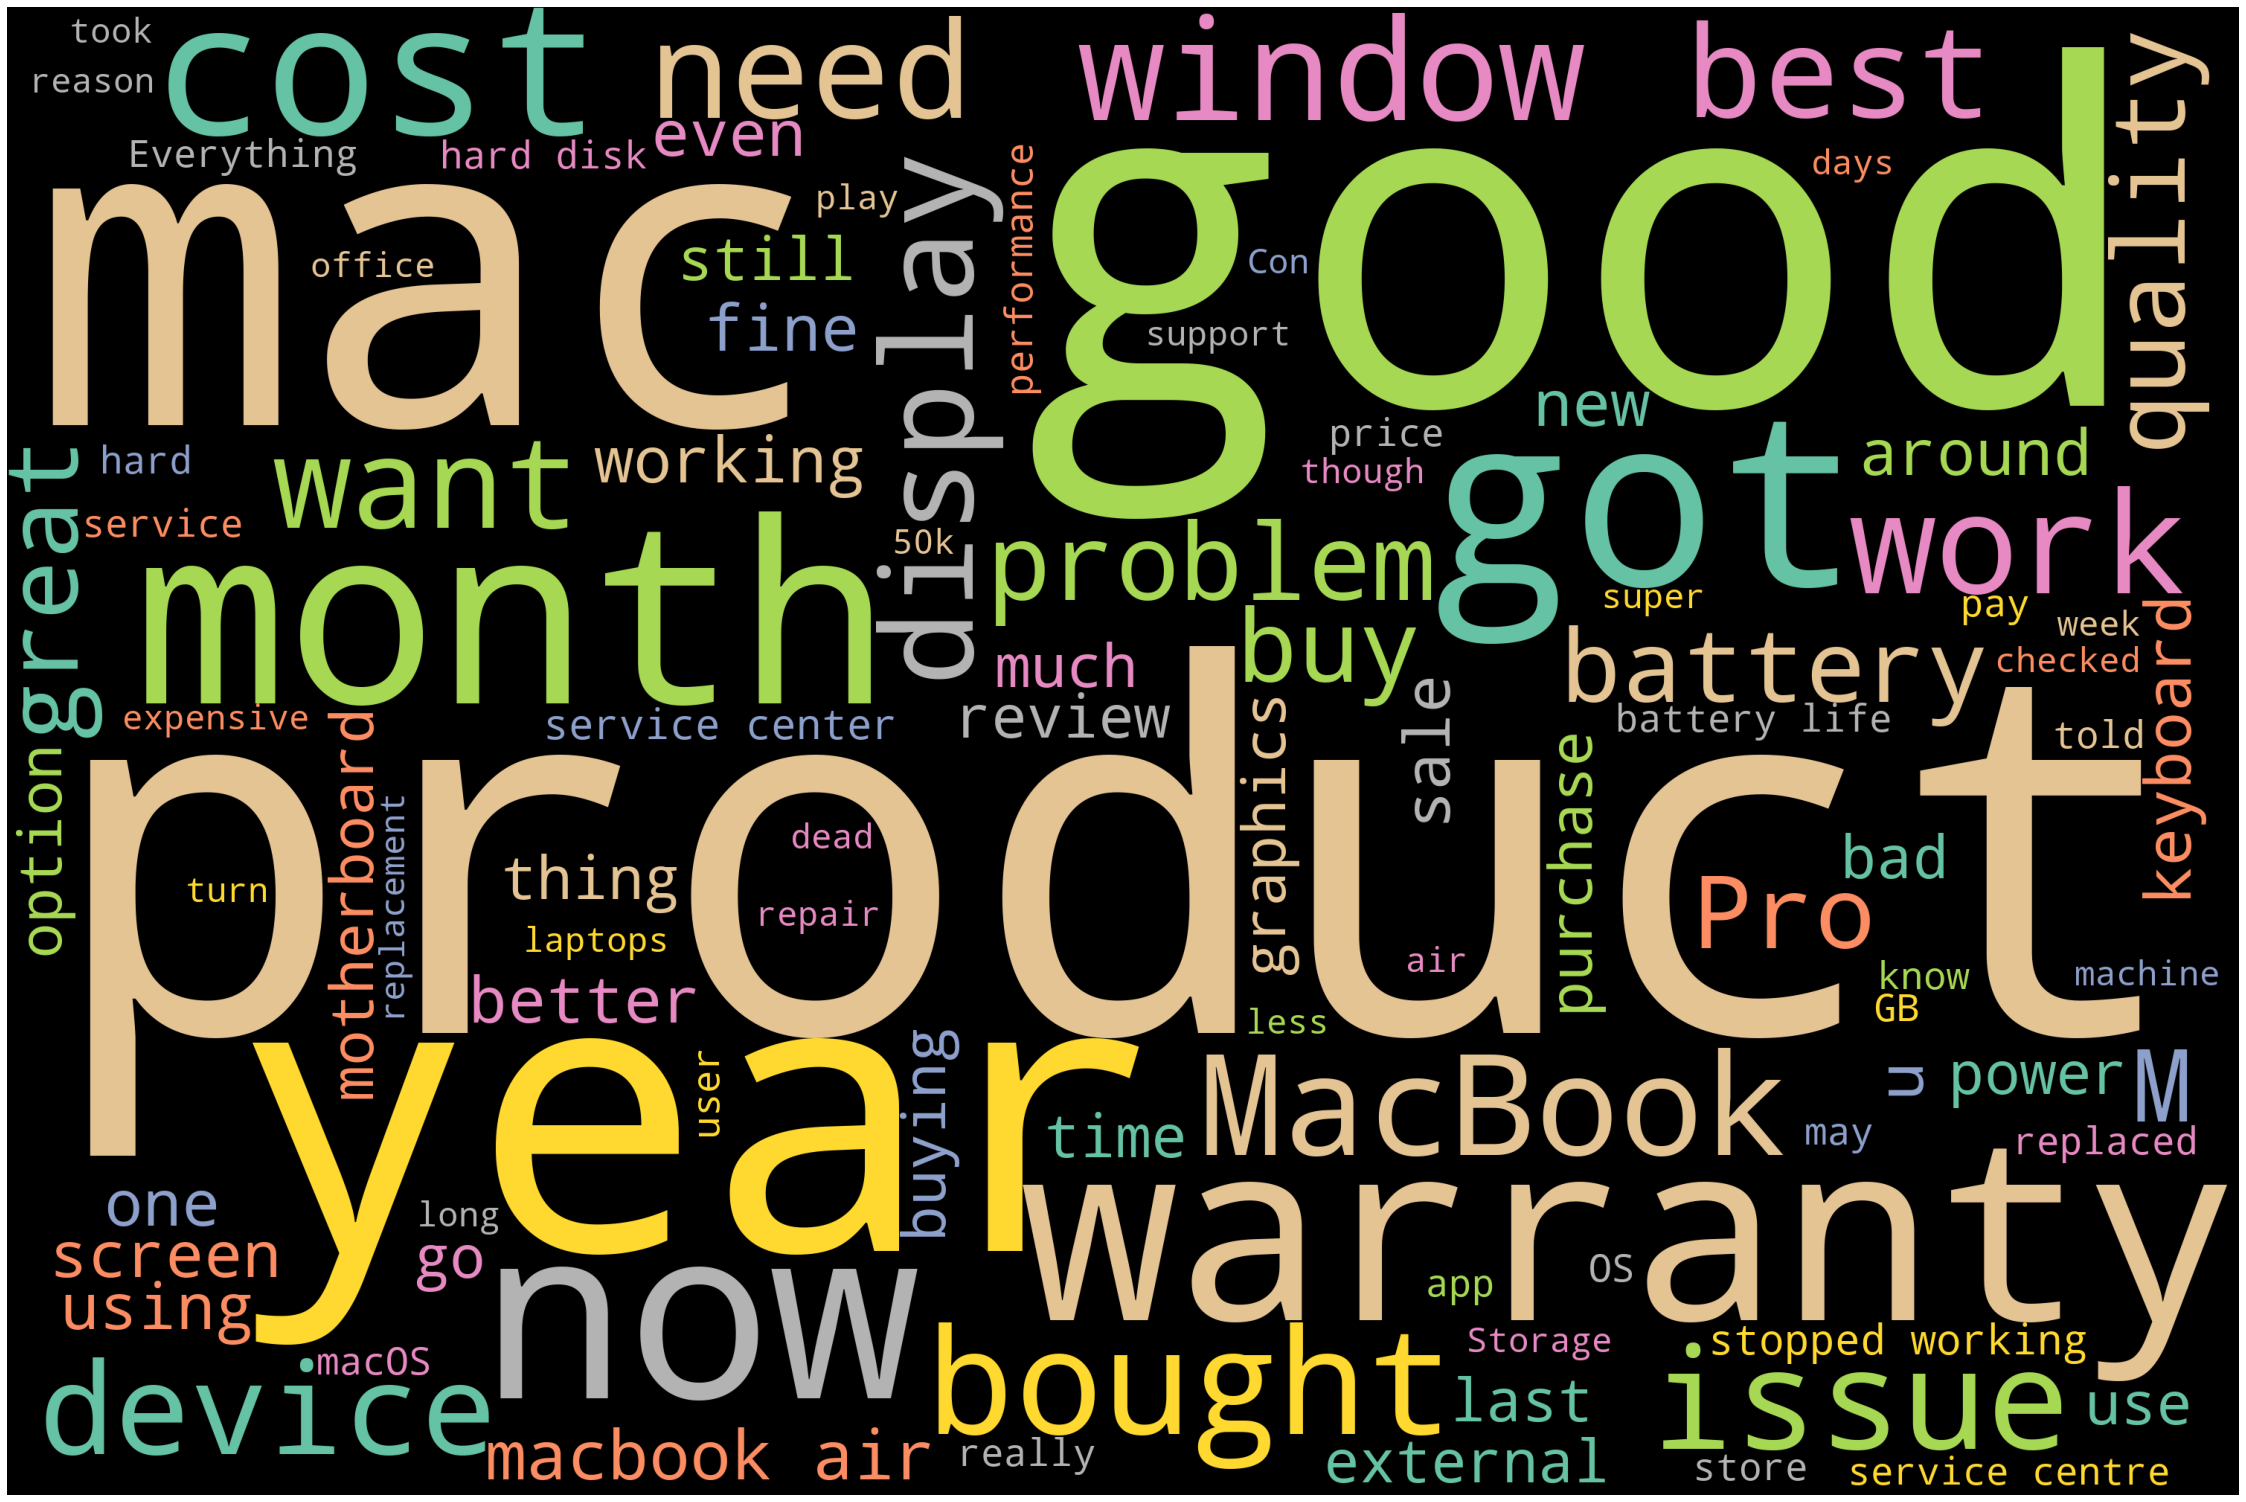

In [34]:
# Generate wordcloud
stopwords=STOPWORDS
stopwords.add('will')
stopwords.add('apple')
stopwords.add('Amazon')
stopwords.add('laptop')

wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
#plot
plot_cloud(wordcloud)

# Named Entity Recognition

In [35]:
!pip install spacy
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
!python -m spacy download en
# Excute above command through anaconda command prompt

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-01-24 07:08:19.778071: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 78.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [37]:
import numpy as np
import pandas as pd
import string
import spacy

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [38]:
import pandas 

book=pd.read_csv('/content/apple.txt',error_bad_lines=False)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 6: expected 1 fields, saw 14\n'


In [39]:
book

,x
0,It's amazing..... battery last around 10 -12 h...
1,Finally a MacBook possession. Got it in 50k in...
2,Best Laptop under 60k. If you don't want any a...
3,Pros:1. Light weight and super fast response t...
4,""""
5,I am very upset about the product as I checked...
6,Reason for 1 star is I ot an defective piece. ...
7,Got the Apple Macbook air on amazon discount s...
8,White line coming on screen in just three mont...
9,"Bought this product recently on 5 April, was w..."


In [40]:
#remove both the leading and the trailing characters
book=[x.strip() for x in book.x]  
# removes empty strings,because they are considered in python as Flase
book=[x for x in book if x]
# 
book[0:10]

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by wo

In [41]:
book[2]   #column 2

"Best Laptop under 60k. If you don't want any accounting softwares like tally or busy then go for it, better than windows in every term. I just love it's battery life with sleek look 😍Now talking about MS officeIt's available on app store, free for 1 monthAfter that you will have to pay.You cannot install pirated version but if you install Windows 7 or any other version then u can use Ms office for freeBut in MacBook there are other apps which are good substitute for Ms office appsNumbers for ExcelPages for wordKeynote for PowerPointAnd you can convert your numbers file to Excel file or csv fileSame for the pages & keynoteSo no need of Ms office for me.Cons1. U cannot play games, your laptop will just heat up, battery will drain* U cannot play pubg mobile on emulator if you are pubg lover😁2. Storage 128gb, it will work fine but if you want to store movies or TV shows u can't, u have to buy external hard disk"

### part of speech tagging

In [42]:
nlp=spacy.load('en_core_web_sm')

one_block=book[2]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [43]:
one_block

"Best Laptop under 60k. If you don't want any accounting softwares like tally or busy then go for it, better than windows in every term. I just love it's battery life with sleek look 😍Now talking about MS officeIt's available on app store, free for 1 monthAfter that you will have to pay.You cannot install pirated version but if you install Windows 7 or any other version then u can use Ms office for freeBut in MacBook there are other apps which are good substitute for Ms office appsNumbers for ExcelPages for wordKeynote for PowerPointAnd you can convert your numbers file to Excel file or csv fileSame for the pages & keynoteSo no need of Ms office for me.Cons1. U cannot play games, your laptop will just heat up, battery will drain* U cannot play pubg mobile on emulator if you are pubg lover😁2. Storage 128gb, it will work fine but if you want to store movies or TV shows u can't, u have to buy external hard disk"

In [44]:
for token in doc_block[0:20]:
  print(token,token.pos_)

Best ADJ
Laptop PROPN
under ADP
60k NOUN
. PUNCT
If SCONJ
you PRON
do AUX
n't PART
want VERB
any DET
accounting NOUN
softwares NOUN
like ADP
tally NOUN
or CCONJ
busy ADJ
then ADV
go VERB
for ADP


### Filtering for Nouns and Verbs only

In [45]:
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[5:25])

['go', 'windows', 'term', 'love', 'battery', 'life', 'look', '😍', 'talking', 'app', 'store', 'monthAfter', 'have', 'pay', 'install', 'pirated', 'version', 'install', 'version', 'use']


In [46]:
# Count tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)
words_freq=[(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x:x[1],reverse=True)
wf_df=pd.DataFrame(words_freq)
wf_df.columns=['words','count']

wf_df[0:10]

,words,count
0,office,3
1,want,2
2,battery,2
3,store,2
4,have,2
5,install,2
6,version,2
7,file,2
8,play,2
9,60k,1


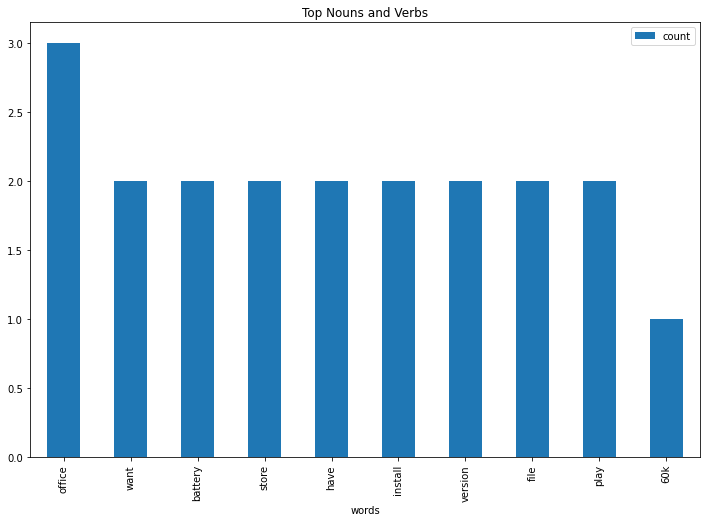

In [47]:
# visualizing results
## barchart for top 10 nouns + verbs

wf_df[0:10].plot.bar(x='words', figsize=(12,8), title='Top Nouns and Verbs')

# Emotion Mining

## Sentiment Analysis

In [48]:
afinn=pd.read_csv("/content/Afinn.csv",sep=",",encoding='latin-1')

In [49]:
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [50]:
afinn[1500:]

,word,value
1500,masterpieces,4
1501,matter,1
1502,matters,1
1503,mature,2
1504,meaningful,2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [51]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [52]:
from nltk import tokenize
sentences= tokenize.sent_tokenize("".join(book))
sentences[5:15]

['), all printers are not compatible (e.g.',
 "the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by working on these (still mostly the document and slides either do not open in windows environment or have distortion issues).",
 'you need to spend extra for an external CD writer and tp buy a carry bag.',
 'Mac con not be connected to most of the projectors unless you buy some connectors, which are expensive and theres no clarity which one to buy and from where.',
 "you can't connect it to your TV, the ports are different and again theres no clarity - customer support, manuals or help section are silent !",
 'Marketing strategy for Indian market, if at all has been planned, has been very bad.',
 'If these critical issues (and a few more not mentioned here) are handled properly, the Mac can sweep away other laptops in India.',
 "Presently, it doesn't seem to be happening.Overall V

In [53]:
sent_df=pd.DataFrame(sentences,columns=['sentences'])
sent_df

,sentences
0,It's amazing..... battery last around 10 -12 h...
1,Got it in 50k in Diwali sale.
2,Technically good laptop.Good News.luxury produ...
3,Terrific sense of possession & pride.Bad News.
4,Problems will be there if you are switching fr...
...,...
159,"Coming to the performance, the speed of this i..."
160,You can get one of the best movie experiences ...
161,Overall I would it a 4.5/5.I got a great deal ...
162,I got it not only on discount but also was abl...


In [54]:
affinity_scores= afinn.set_index("word")['value'].to_dict()

In [55]:
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [56]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence. 
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str=None):
  sent_score=0
  if text:
    sentence=nlp(text)
    print(sentence)
    for word in sentence:
      sent_score += sentiment_lexicon.get(word.lemma_, 0)
      return sent_score



In [57]:
#test that it works
calculate_sentiment(text='Unhappy')

Unhappy


0

In [58]:
sent_df['sentiment_value'] = sent_df['sentences'].apply(calculate_sentiment)

It's amazing..... battery last around 10 -12 hrs.....best laptop for students and codersFinally a MacBook possession.
Got it in 50k in Diwali sale.
Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better.
Terrific sense of possession & pride.Bad News.
Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!
), all printers are not compatible (e.g.
the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by working 

In [59]:
# how many words are in the sentence?
sent_df['word_count']=sent_df['sentences'].str.split().apply(len)
sent_df['word_count'].head(10)

0    16
1     7
2    31
3     7
4    65
5     7
6    47
7    16
8    29
9    26
Name: word_count, dtype: int64

In [60]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentences,sentiment_value,word_count
60,"!I bought MacBook air in 2017, it was working ...",0,13
61,It suddenly stopped charging I took it apple c...,0,16
54,"And the best part, it was a week after Warrant...",0,86
47,I m stuck with a dead mac after using it for 1...,0,12
79,"Cooling not appropriate for this cpu, need a b...",1,62
91,"Yes, I changed the thermal paste and dusted th...",1,24
89,Thank You if you read the whole review because...,2,17
157,great productThe elegant work of apple can be ...,3,12
22,Beautiful looks and feels like a prime product.4.,3,8
3,Terrific sense of possession & pride.Bad News.,4,7


In [61]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    164.000000
mean       0.036585
std        0.584989
min       -3.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        4.000000
Name: sentiment_value, dtype: float64

In [71]:
# sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentences,sentiment_value,word_count
0,It's amazing..... battery last around 10 -12 h...,0,16
1,Got it in 50k in Diwali sale.,0,7
2,Technically good laptop.Good News.luxury produ...,0,31
4,Problems will be there if you are switching fr...,-2,65
5,"), all printers are not compatible (e.g.",0,7


In [72]:
sent_df[sent_df['sentiment_value']<-1].head()['sentences'].tolist()[0]  #<-5

'Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!'

In [73]:
sent_df['index']=range(0,len(sent_df))

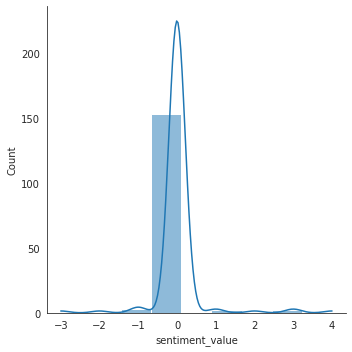

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style='white')

sns.displot(data=sent_df,x='sentiment_value',kde=True)
plt.show()

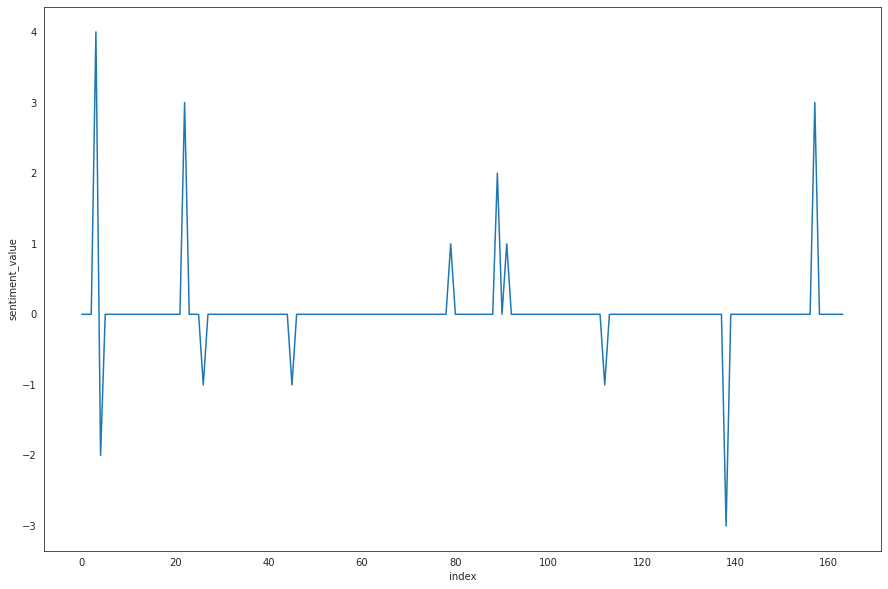

In [75]:
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

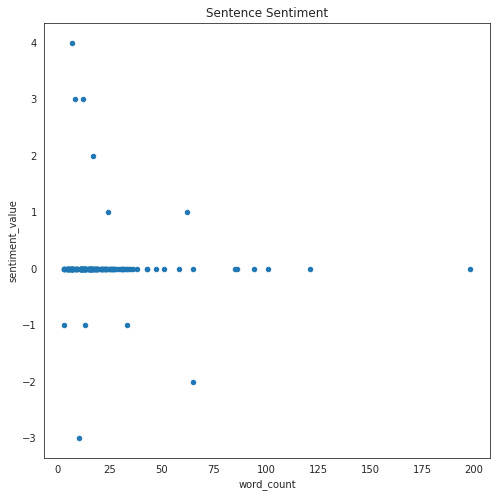

In [76]:
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence Sentiment')